In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [2]:
df = pd.read_excel("/content/Airlines+Data.xlsx")

In [3]:
df1 = df.copy()


In [4]:
df1.head()


,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
df1.isnull().sum()


Month         0
Passengers    0
dtype: int64

In [6]:
df1.dtypes


Month         datetime64[ns]
Passengers             int64
dtype: object

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [8]:
df1 = df1.set_index('Month')

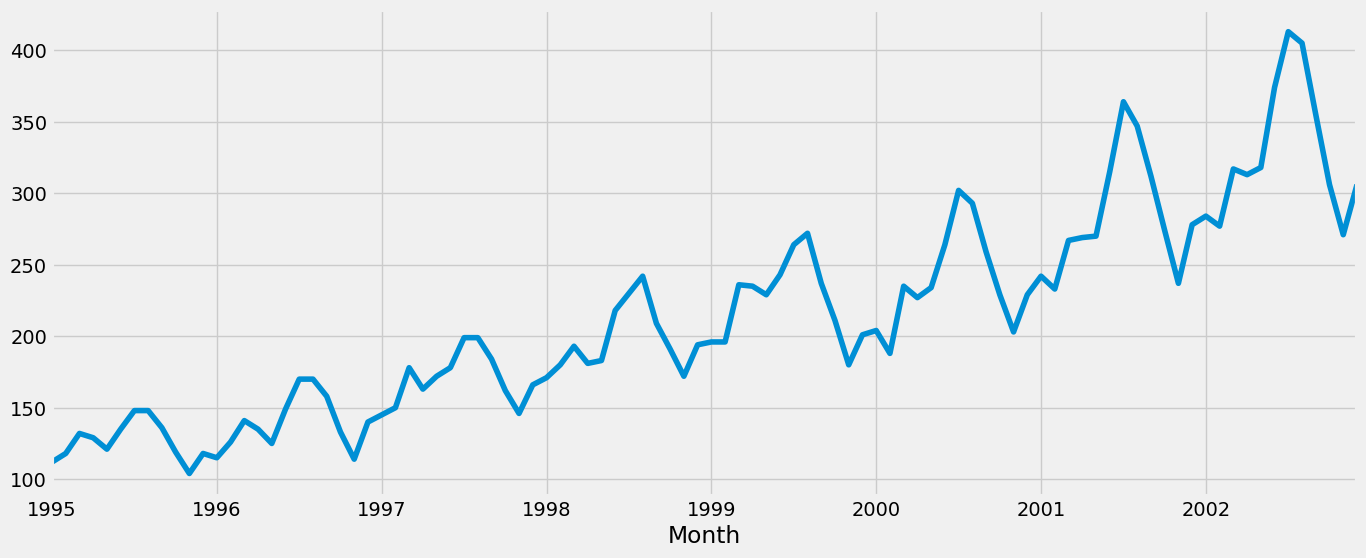

In [9]:
df1['Passengers'].plot(figsize=(15, 6))
plt.show()

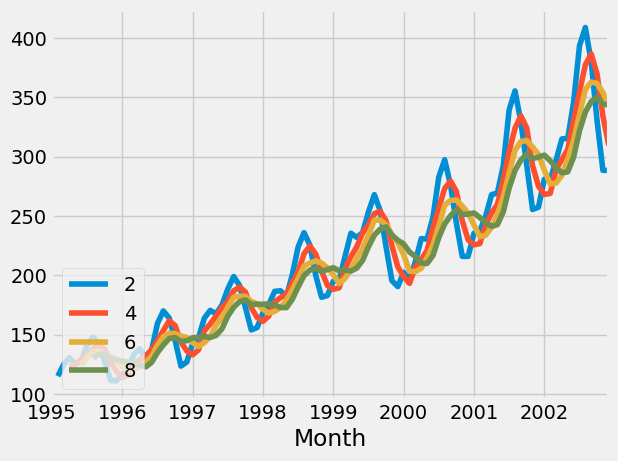

In [10]:
for i in range(2,10,2):
    df1['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

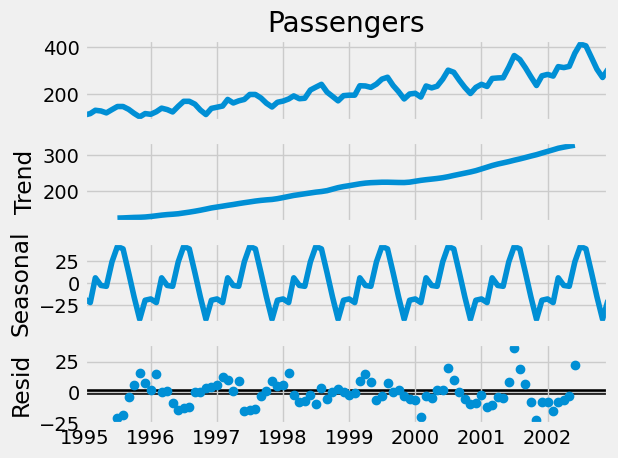

In [11]:
ts_add = seasonal_decompose(df1['Passengers'],model="additive")
fig = ts_add.plot()
plt.show()

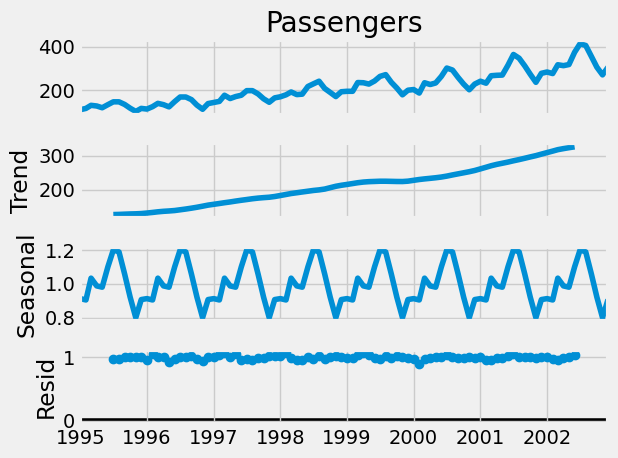

In [12]:
ts_mul = seasonal_decompose(df1.Passengers,model="multiplicative")
fig = ts_mul.plot()
plt.show()

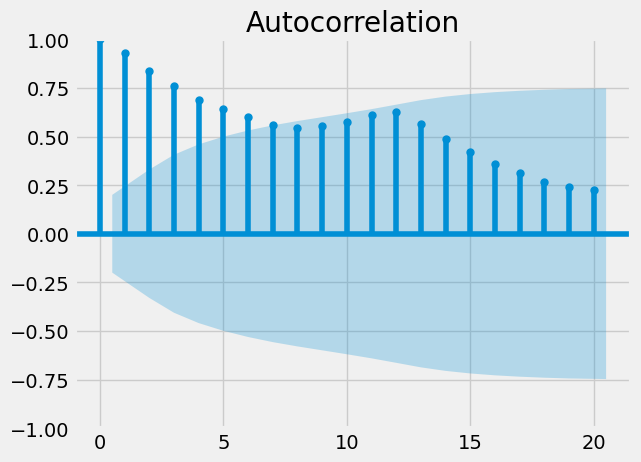

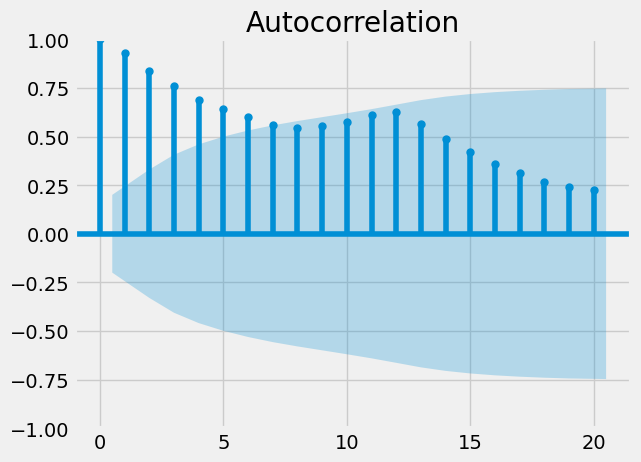

In [13]:
tsa_plots.plot_acf(df1['Passengers'])


Building Time series forecasting with ARIMA

In [14]:
X = df1['Passengers'].values


In [15]:
size = int(len(X) * 0.66)


In [16]:
train, test = X[0:size], X[size:len(X)]


In [17]:
model = sm.tsa.arima.ARIMA(train, order=(5,1,0))


In [18]:
model_fit = model.fit()


In [19]:
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   63
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -263.583
Date:                Sun, 27 Aug 2023   AIC                            539.167
Time:                        05:48:56   BIC                            551.929
Sample:                             0   HQIC                           544.178
                                 - 63                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1062      0.160      0.663      0.507      -0.208       0.420
ar.L2         -0.1976      0.170     -1.159      0.246      -0.532       0.136
ar.L3         -0.0706      0.126     -0.562      0.5

This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations

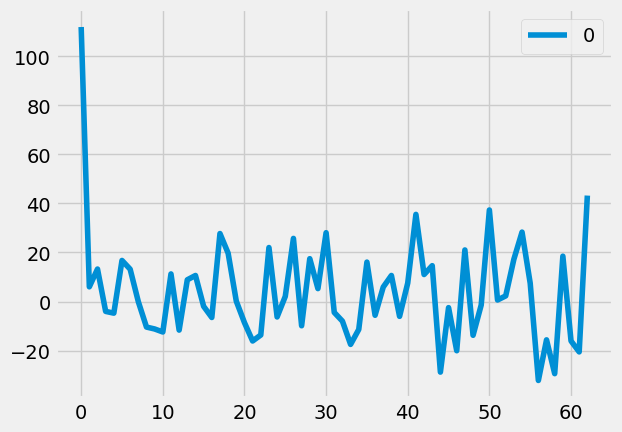

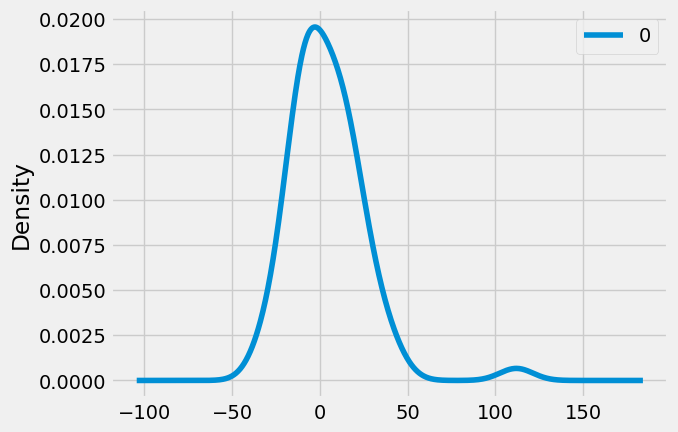

                0
count   63.000000
mean     4.228944
std     21.710779
min    -32.213037
25%    -10.165143
50%      0.616449
75%     15.360977
max    112.000000


In [20]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

The plot of the residual errors suggests that there may still be some trend information not captured by the model


The results show that there is no a bias in the prediction (a zero mean in the residuals)

Rolling Forecast ARIMA Model

In [21]:
history = [x for x in train]

In [22]:
predictions = list()

In [23]:
for t in range(len(test)):
	model = sm.tsa.arima.ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=237.351697, expected=227.000000
predicted=218.673588, expected=234.000000
predicted=235.603571, expected=264.000000
predicted=250.751821, expected=302.000000
predicted=306.236426, expected=293.000000
predicted=283.001988, expected=259.000000
predicted=247.529991, expected=229.000000
predicted=224.116737, expected=203.000000
predicted=207.700690, expected=229.000000
predicted=249.298532, expected=242.000000
predicted=248.869263, expected=233.000000
predicted=231.312583, expected=267.000000
predicted=266.498530, expected=269.000000
predicted=259.866113, expected=270.000000
predicted=269.604000, expected=315.000000
predicted=312.657188, expected=364.000000
predicted=368.277208, expected=347.000000
predicted=332.664432, expected=312.000000
predicted=298.257405, expected=274.000000
predicted=262.776570, expected=237.000000
predicted=240.179592, expected=278.000000
predicted=308.214176, expected=284.000000
predicted=287.379158, expected=277.000000
predicted=281.188134, expected=317

In [24]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 792.015


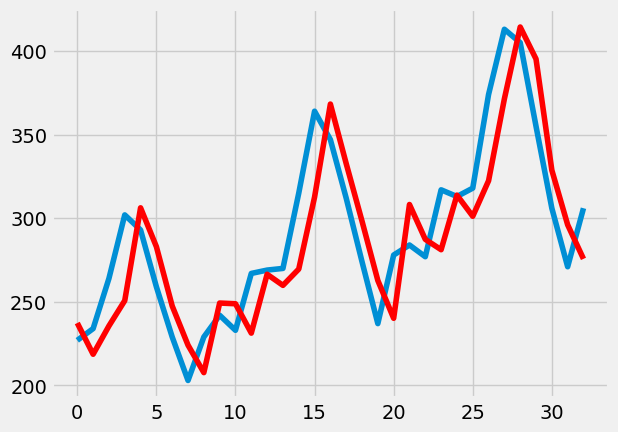

In [25]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale

Comparing Multiple Models

In [26]:
df2 = df.copy()


In [27]:
df2 = pd.get_dummies(df2, columns = ['Month'])


In [28]:
df2.head()


,Passengers,Month_1995-01-01 00:00:00,Month_1995-02-01 00:00:00,Month_1995-03-01 00:00:00,Month_1995-04-01 00:00:00,Month_1995-05-01 00:00:00,Month_1995-06-01 00:00:00,Month_1995-07-01 00:00:00,Month_1995-08-01 00:00:00,Month_1995-09-01 00:00:00,...,Month_2002-03-01 00:00:00,Month_2002-04-01 00:00:00,Month_2002-05-01 00:00:00,Month_2002-06-01 00:00:00,Month_2002-07-01 00:00:00,Month_2002-08-01 00:00:00,Month_2002-09-01 00:00:00,Month_2002-10-01 00:00:00,Month_2002-11-01 00:00:00,Month_2002-12-01 00:00:00
0,112,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,118,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,121,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df2.shape


(96, 97)

In [30]:
t= np.arange(1,97)


In [31]:
df2['t'] = t


In [32]:
df2['t_sq'] = df2['t']*df2['t']


In [33]:
log_Passengers=np.log(df2['Passengers'])


In [34]:
df2['log_Passengers']=log_Passengers


In [35]:
df2.rename(columns = {"Month_1995-01-01 00:00:00" : "Month_1", "Month_1995-02-01 00:00:00" : "Month_2", "Month_1995-03-01 00:00:00" : "Month_3", "Month_1995-04-01 00:00:00" : "Month_4", "Month_1995-05-01 00:00:00" : "Month_5", "Month_1995-06-01 00:00:00" : "Month_6", "Month_1995-07-01 00:00:00" : "Month_7", "Month_1995-08-01 00:00:00" : "Month_8", "Month_1995-09-01 00:00:00" : "Month_9", "Month_1995-10-01 00:00:00" : "Month_10", "Month_1995-11-01 00:00:00" : "Month_11", "Month_1995-12-01 00:00:00" : "Month_12" }, inplace = True)

In [36]:
df2.head()


,Passengers,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,...,Month_2002-06-01 00:00:00,Month_2002-07-01 00:00:00,Month_2002-08-01 00:00:00,Month_2002-09-01 00:00:00,Month_2002-10-01 00:00:00,Month_2002-11-01 00:00:00,Month_2002-12-01 00:00:00,t,t_sq,log_Passengers
0,112,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,4.882802
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,5,25,4.795791


In [37]:
train1, test1 = np.split(df2, [int(.67 *len(df2))])


In [38]:
linear= smf.ols('Passengers ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Passengers'])-np.array(predlin))**2))
rmselin

25.50398351648347

In [39]:
linear= smf.ols('Passengers ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Passengers'])-np.array(predlin))**2))
rmselin

25.50398351648347

In [40]:
expo=smf.ols('Passengers~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

1.6030945933279498e+128

In [41]:
additive= smf.ols('Passengers~ Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11+Month_12',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predadd))**2))
rmseadd


118.60439843615573

In [42]:
addquad=smf.ols('Passengers~t+t_sq+Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11+Month_12',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

83.97481125260262

In [43]:
addlinear= smf.ols('Passengers~ Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11+Month_12',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear


118.60439843615573

In [44]:
mulsea=smf.ols('log_Passengers~Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11+Month_12',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul


122.20973607172188

In [45]:
mullin= smf.ols('log_Passengers~t+Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11+Month_12',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin

40.90194555071146

In [46]:
mul_quad= smf.ols('log_Passengers~t+t_sq+Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11+Month_12',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

100.05904451761033

In [47]:
quad=smf.ols('Passengers~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predquad))**2))
rmsequad

53.189555144151804

Conclusion

In [48]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}


In [49]:
rmse=pd.DataFrame(output)


In [50]:
print(rmse)


           Model         Values
0  rmse_mul_quad   1.000590e+02
1        rmseadd   1.186044e+02
2  rmseaddlinear   1.186044e+02
3    rmseaddquad   8.397481e+01
4       rmseexpo  1.603095e+128
5        rmselin   2.550398e+01
6        rmsemul   1.222097e+02
7      rmsemulin   4.090195e+01
8       rmsequad   5.318956e+01


Multiplicative seasonality with linear trend has the best RMSE value